In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import neattext.functions as nfx
import matplotlib.pyplot as plt
from textblob import TextBlob

In [116]:
data = pd.read_csv('data.csv')

In [117]:
data.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [118]:
data.shape

(34792, 4)

D:\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


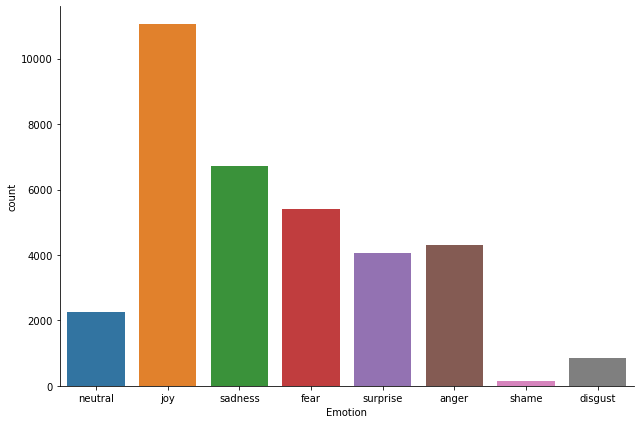

In [121]:
sns.factorplot(x='Emotion',data=data,kind="count",size=6,aspect=1.5)
plt.show()

In [122]:
data['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [123]:
def get_emotion(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment>0:
        result = "Positive"
    elif sentiment<0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [125]:
data['sentiment'] = data['Text'].apply(get_emotion)

In [126]:
data['sentiment'].value_counts()

Positive    13616
Neutral     12371
Negative     8805
Name: sentiment, dtype: int64

In [128]:
data.groupby(['Emotion','sentiment']).size()

Emotion   sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

D:\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


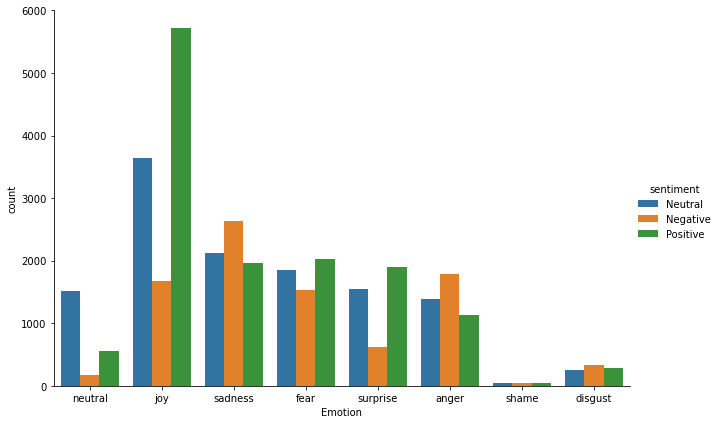

In [130]:
sns.factorplot(data=data,x='Emotion',hue='sentiment',kind='count',size=6,aspect=1.5)

In [132]:
data['clean_text'] = data['Text'].apply(nfx.remove_stopwords).apply(nfx.remove_punctuations).apply(nfx.remove_stopwords)

In [133]:
from collections import Counter
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [135]:
emotion_list = data['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [136]:
joy_list = data[data['Emotion']=='joy']['clean_text'].tolist()
joy_list

['Sage Act upgrade list tommorow',
 'eye true hazel eyeand brilliant Regular features open countenance complexion Oh bloom health pretty height size firm upright figure health merely bloom air head glance hears child picture health gives idea complete picture grownup health loveliness',
 '@Iluvmiasantos ugh babe hugggzzz u babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life Leopold truly happy : hopes prayers beloved son come fruition',
 'feeling fail french #fuckfrench',
 'GoodLet',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'terribly ecstatic dangerous thing',
 'selected study university',
 'Yeah ’ ages',
 'passed BA exams class results',
 'heard selected fot year university Zambia form Chikola secondary school',
 'Welp time study days',
 'Heading campus rain grad photos',
 'feeling awesome',
 '@TheBodyShopUK brings Ive bought Christmas presents trawl loads shops :)',
 'shit pants Pure 100% gravy',
 'life Leopold truly

In [137]:
joy_docx = ' '.join(joy_list)

In [138]:
joy_docx

'Sage Act upgrade list tommorow eye true hazel eyeand brilliant Regular features open countenance complexion Oh bloom health pretty height size firm upright figure health merely bloom air head glance hears child picture health gives idea complete picture grownup health loveliness @Iluvmiasantos ugh babe hugggzzz u babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life Leopold truly happy : hopes prayers beloved son come fruition feeling fail french #fuckfrench GoodLet fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing selected study university Yeah ’ ages passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome @TheBodyShopUK brings Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life Leopold truly happy : hopes prayers beloved son come fruition Class jamming paper 

In [139]:
!pip3 install wordcloud

In [140]:
from wordcloud import WordCloud

In [141]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()

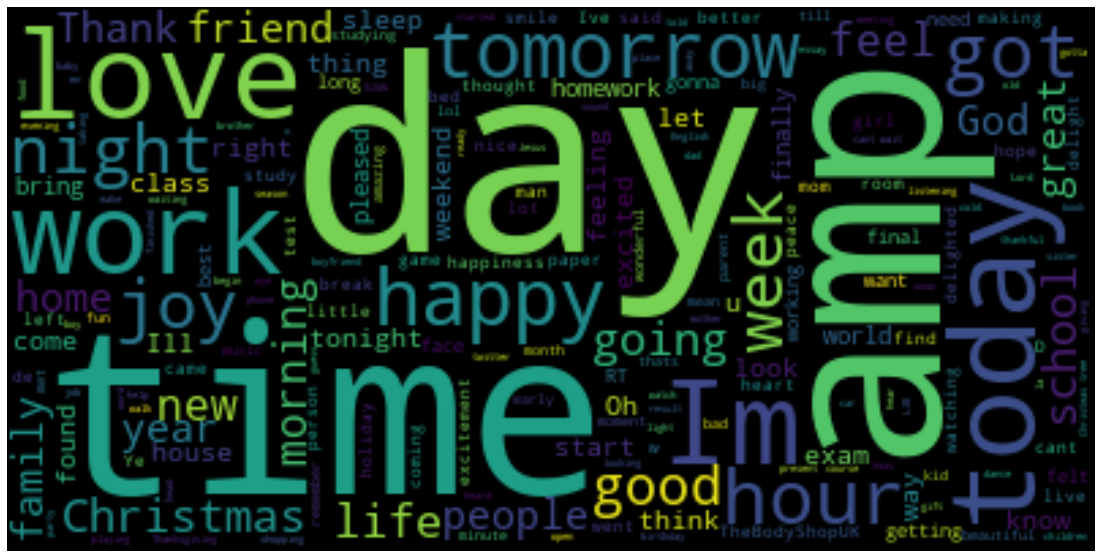

In [142]:
plot_wordcloud(joy_docx)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix


In [145]:
X = data['clean_text']
y = data['Emotion']

In [146]:
#vectorizer
cv = CountVectorizer()
X_ = cv.fit_transform(X)

In [147]:
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '05thuglife',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100prayingwomen',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '1116am',
 '112',
 '112mark',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '12

In [148]:
X_.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [149]:
#splitting the dataset

X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size=0.4,random_state=True)

In [150]:
#model building
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [151]:
#Accuracy
nv_model.score(X_test,y_test)

0.5604656175899978

In [152]:
y_pred_for_nv = nv_model.predict(X_test)

In [153]:
y_pred_for_nv

array(['joy', 'joy', 'joy', ..., 'anger', 'joy', 'joy'], dtype='<U8')

In [156]:
#Making a single prediction
sample = ["I love coffee"]
vect = cv.transform(sample).toarray()

In [157]:
#making prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [158]:
nv_model.predict_proba(vect)

array([[2.15402743e-02, 3.92280643e-04, 3.42607692e-02, 8.45505730e-01,
        2.71471875e-03, 7.56378894e-02, 7.77621012e-06, 1.99405611e-02]])

In [159]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [160]:
np.max(nv_model.predict_proba(vect))

0.8455057303129845

In [179]:
def predict_emotion(text,model):
    myvect = cv.transform(text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction : {}, Prediction Score : {}".format(prediction[0],np.max(pred_proba)))
    print(prediction[0])
    return pred_percentage_for_all

In [180]:
predict_emotion(sample,nv_model)

Prediction : joy, Prediction Score : 0.8455057303129845
joy


{'anger': 0.021540274330865024,
 'disgust': 0.00039228064296962167,
 'fear': 0.034260769239190456,
 'joy': 0.8455057303129845,
 'neutral': 0.0027147187510184003,
 'sadness': 0.07563788942496807,
 'shame': 7.776210121522805e-06,
 'surprise': 0.01994056108788166}

In [182]:
predict_emotion(['I love cats'],nv_model)

Prediction : joy, Prediction Score : 0.46761225549333746
joy


{'anger': 0.012634983063763157,
 'disgust': 0.0012655607640909491,
 'fear': 0.44212311847415126,
 'joy': 0.46761225549333746,
 'neutral': 0.0035032486036757522,
 'sadness': 0.04067000961787705,
 'shame': 2.508731083090493e-05,
 'surprise': 0.032165736672273175}

In [183]:
#model evaluation
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.68      0.45      0.54      1736
     disgust       0.55      0.02      0.03       341
        fear       0.74      0.58      0.65      2183
         joy       0.50      0.88      0.63      4414
     neutral       0.50      0.03      0.06       914
     sadness       0.56      0.52      0.54      2650
       shame       0.00      0.00      0.00        69
    surprise       0.65      0.28      0.39      1610

    accuracy                           0.56     13917
   macro avg       0.52      0.35      0.36     13917
weighted avg       0.59      0.56      0.52     13917



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
#confusion matrix
confusion_matrix(y_test,y_pred_for_nv)

array([[ 782,    1,   93,  581,    4,  254,    0,   21],
       [  46,    6,   38,  148,    1,   88,    0,   14],
       [  81,    1, 1276,  526,    0,  227,    0,   72],
       [  66,    1,  115, 3885,    9,  257,    0,   81],
       [  18,    0,   19,  770,   27,   77,    0,    3],
       [  93,    1,   94, 1034,    7, 1375,    0,   46],
       [  14,    0,   18,   13,    0,   24,    0,    0],
       [  44,    1,   69,  870,    6,  171,    0,  449]], dtype=int64)

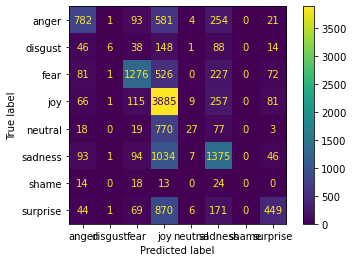

In [185]:
#plotting confusion matrix
plot_confusion_matrix(nv_model,X_test,y_test)

In [187]:
# Model Interpretation
lm = LogisticRegression()
lm.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
# accuracy
lm.score(X_test,y_test)

0.6280089099662284

In [189]:
predict_emotion(sample,lm)

Prediction : joy, Prediction Score : 0.5698926698361192
joy


{'anger': 0.04683761981728148,
 'disgust': 0.007168549763020472,
 'fear': 0.03831461884481938,
 'joy': 0.5698926698361192,
 'neutral': 0.15873419513942372,
 'sadness': 0.09922934174203539,
 'shame': 0.001448805405731122,
 'surprise': 0.07837419945156918}

In [191]:
!pip3 install eli5

  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=e073db4ca6d6636b3072b069b230826afe54791e9fba0ee1799cd9336f3fc20b
  Stored in directory: c:\users\meghana r\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.1.2 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.1 which is incompatible.


In [192]:
import eli5

In [193]:
eli5.show_weights(lm,top=20)

In [201]:
class_names = y.unique()

In [202]:
feature_names = cv.get_feature_names()

In [204]:
eli5.show_weights(lm,feature_names=feature_names)